In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from pickle import dump
from pickle import load

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from numpy import set_printoptions
pd.set_option('display.width', 100)
pd.set_option('precision', 5)

%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('sonar_data.csv')
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [3]:
#dimensions of the dataset
df.shape

(208, 61)

In [4]:
df.sample(10)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
155,0.0211,0.0128,0.0015,0.0450,0.0711,0.1563,0.1518,0.1206,0.1666,0.1345,...,0.0117,0.0023,0.0047,0.0049,0.0031,0.0024,0.0039,0.0051,0.0015,Mine
96,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085,Rock
175,0.0294,0.0123,0.0117,0.0113,0.0497,0.0998,0.1326,0.1117,0.2984,0.3473,...,0.0056,0.0104,0.0079,0.0014,0.0054,0.0015,0.0006,0.0081,0.0043,Mine
133,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,Mine
118,0.0363,0.0478,0.0298,0.0210,0.1409,0.1916,0.1349,0.1613,0.1703,0.1444,...,0.0115,0.0190,0.0055,0.0096,0.0050,0.0066,0.0114,0.0073,0.0033,Mine
128,0.0374,0.0586,0.0628,0.0534,0.0255,0.1422,0.2072,0.2734,0.3070,0.2597,...,0.0118,0.0063,0.0237,0.0032,0.0087,0.0124,0.0113,0.0098,0.0126,Mine
168,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,Mine
72,0.0208,0.0186,0.0131,0.0211,0.0610,0.0613,0.0612,0.0506,0.0989,0.1093,...,0.0074,0.0063,0.0081,0.0087,0.0044,0.0028,0.0019,0.0049,0.0023,Rock
43,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,Rock
82,0.0409,0.0421,0.0573,0.0130,0.0183,0.1019,0.1054,0.1070,0.2302,0.2259,...,0.0028,0.0036,0.0105,0.0120,0.0087,0.0061,0.0061,0.0030,0.0078,Rock


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

In [6]:
# Any missing values?
df.isnull().values.any()

False

In [8]:
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,...,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000,208.00000
mean,0.02916,0.03844,0.04383,0.05389,0.07520,0.10457,0.12175,0.13480,0.17800,0.20826,...,0.01607,0.01342,0.01071,0.01094,0.00929,0.00822,0.00782,0.00795,0.00794,0.00651
std,0.02299,0.03296,0.03843,0.04653,0.05555,0.05911,0.06179,0.08515,0.11839,0.13442,...,0.01201,0.00963,0.00706,0.00730,0.00709,0.00574,0.00579,0.00647,0.00618,0.00503
min,0.00150,0.00060,0.00150,0.00580,0.00670,0.01020,0.00330,0.00550,0.00750,0.01130,...,0.00000,0.00080,0.00050,0.00100,0.00060,0.00040,0.00030,0.00030,0.00010,0.00060
25%,0.01335,0.01645,0.01895,0.02438,0.03805,0.06703,0.08090,0.08042,0.09703,0.11127,...,0.00843,0.00728,0.00508,0.00537,0.00415,0.00440,0.00370,0.00360,0.00368,0.00310
50%,0.02280,0.03080,0.03430,0.04405,0.06250,0.09215,0.10695,0.11210,0.15225,0.18240,...,0.01390,0.01140,0.00955,0.00930,0.00750,0.00685,0.00595,0.00580,0.00640,0.00530
75%,0.03555,0.04795,0.05795,0.06450,0.10028,0.13412,0.15400,0.16960,0.23342,0.26870,...,0.02082,0.01673,0.01490,0.01450,0.01210,0.01058,0.01043,0.01035,0.01033,0.00853
max,0.13710,0.23390,0.30590,0.42640,0.40100,0.38230,0.37290,0.45900,0.68280,0.71060,...,0.10040,0.07090,0.03900,0.03520,0.04470,0.03940,0.03550,0.04400,0.03640,0.04390


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attribute_1,208.0,0.02916,0.02299,0.0015,0.01335,0.02280,0.03555,0.1371
attribute_2,208.0,0.03844,0.03296,0.0006,0.01645,0.03080,0.04795,0.2339
attribute_3,208.0,0.04383,0.03843,0.0015,0.01895,0.03430,0.05795,0.3059
attribute_4,208.0,0.05389,0.04653,0.0058,0.02438,0.04405,0.06450,0.4264
attribute_5,208.0,0.07520,0.05555,0.0067,0.03805,0.06250,0.10028,0.4010
attribute_6,208.0,0.10457,0.05911,0.0102,0.06703,0.09215,0.13412,0.3823
attribute_7,208.0,0.12175,0.06179,0.0033,0.08090,0.10695,0.15400,0.3729
attribute_8,208.0,0.13480,0.08515,0.0055,0.08042,0.11210,0.16960,0.4590
attribute_9,208.0,0.17800,0.11839,0.0075,0.09703,0.15225,0.23342,0.6828
attribute_10,208.0,0.20826,0.13442,0.0113,0.11127,0.18240,0.26870,0.7106


<AxesSubplot:>

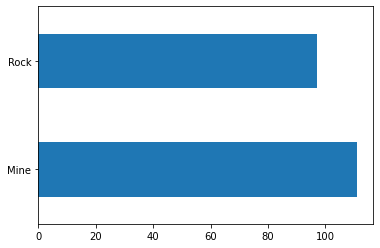

In [16]:
df['Class'].value_counts().plot(kind='barh')

In [17]:
# Breakdown of the data by the class variable (60)
df.groupby('Class').size()

Class
Mine    111
Rock     97
dtype: int64

In [19]:
# Encode Mine and Rock with 1 and 0 (required by the StandardScaler method - see Standardization section below)
df['Class'].replace('M', 1, inplace=True)
df['Class'].replace('R', 0, inplace=True)

In [20]:
df.sample(10)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
185,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,Mine
97,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,Mine
188,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018,Mine
135,0.0094,0.0611,0.1136,0.1203,0.0403,0.1227,0.2495,0.4566,0.6587,0.5079,...,0.0234,0.0175,0.0352,0.0158,0.0326,0.0201,0.0168,0.0245,0.0154,Mine
144,0.0299,0.0688,0.0992,0.1021,0.0800,0.0629,0.0130,0.0813,0.1761,0.0998,...,0.0459,0.0277,0.0172,0.0087,0.0046,0.0203,0.0130,0.0115,0.0015,Mine
81,0.0100,0.0194,0.0155,0.0489,0.0839,0.1009,0.1627,0.2071,0.2696,0.2990,...,0.0130,0.0073,0.0077,0.0075,0.0060,0.0080,0.0019,0.0053,0.0019,Rock
74,0.0109,0.0093,0.0121,0.0378,0.0679,0.0863,0.1004,0.0664,0.0941,0.1036,...,0.0077,0.0023,0.0117,0.0053,0.0077,0.0076,0.0056,0.0055,0.0039,Rock
68,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,...,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012,Rock
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,Mine
49,0.0119,0.0582,0.0623,0.0600,0.1397,0.1883,0.1422,0.1447,0.0487,0.0864,...,0.0025,0.0103,0.0074,0.0123,0.0069,0.0076,0.0073,0.0030,0.0138,Rock


# EDA

## Univariate plots

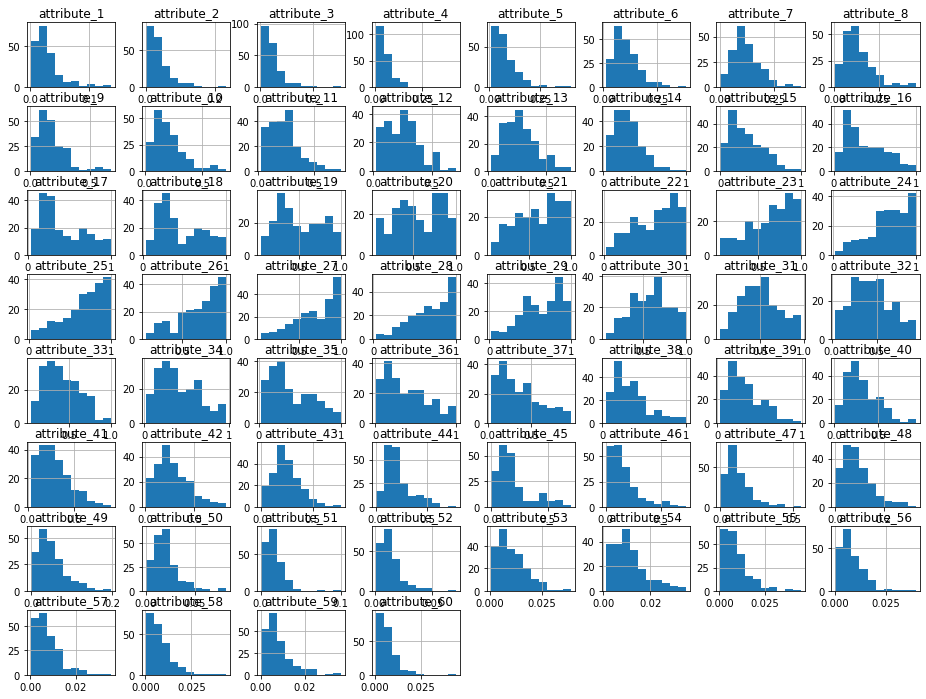

In [21]:
# Histograms
df.hist(figsize=(16,12));

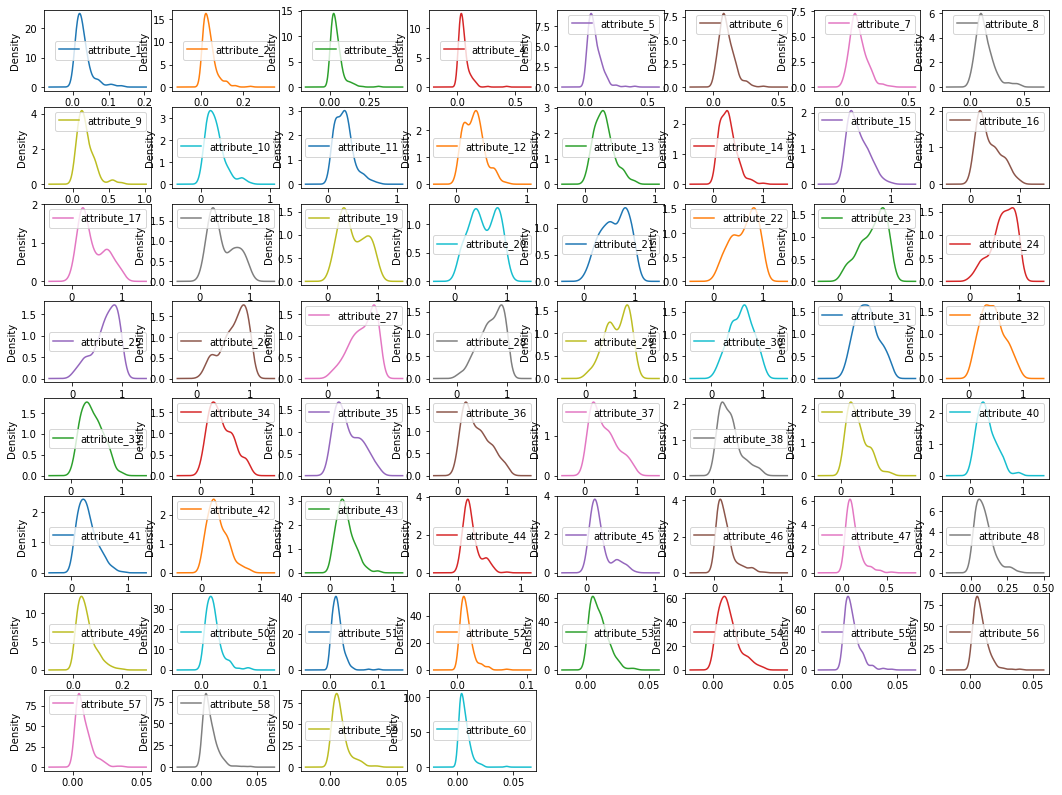

In [22]:
# Density plots
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(18, 14));

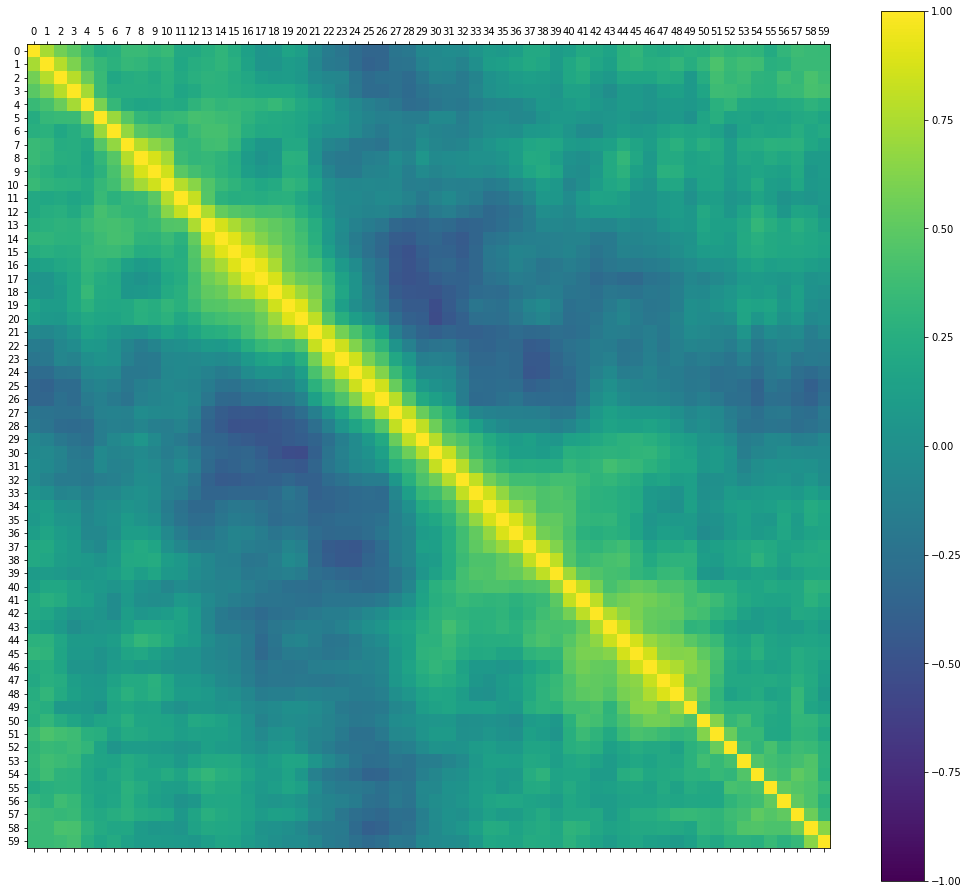

In [23]:
correlations = df.corr()

# Plot correlation matrix
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 60, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

# Test dataset

In [24]:
# Separate data into training and validation datasets
arr = df.values
X = arr[:,0:60]
y = arr[:,60]
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Algorithms evaluation

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 76.94852941176471 (10.05102950966478)


C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 74.63235294117648 (11.785367885381074)
KNN: 80.80882352941175 (6.750704820308338)


C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 72.97794117647058 (8.945616762194508)
NB: 64.88970588235294 (14.18684214516758)
SVM: 77.64705882352942 (9.041128152498237)


C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


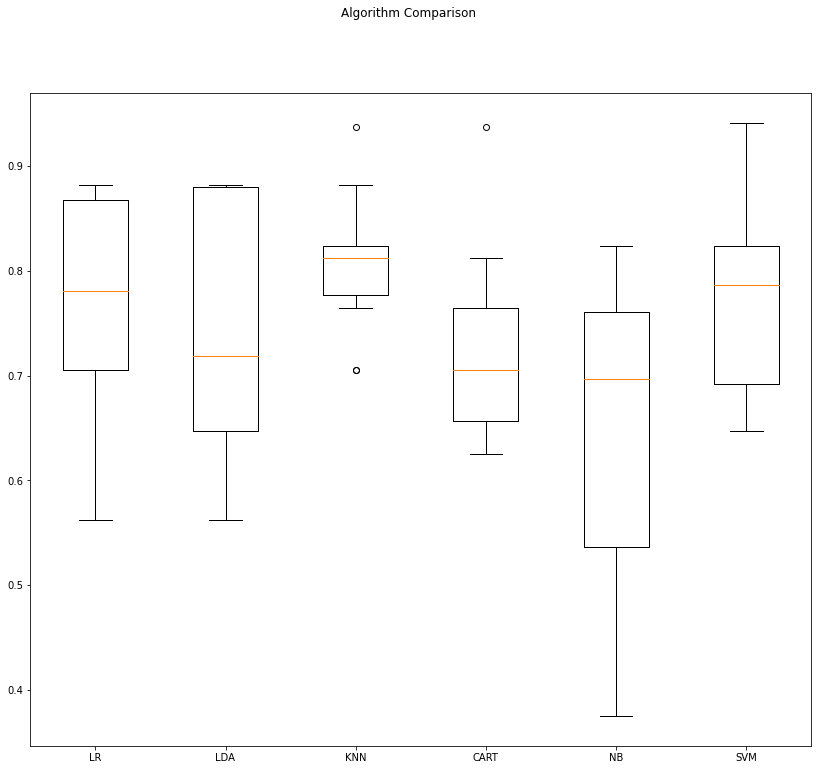

In [25]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

def eval_algorithms(models, show_boxplots=True):
    # Evaluate each model in turn
    # Setup the test harness to use 10-fold cross validation
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("Estimated accuracy of {} with the mean of {} and std. dev. {}".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        
    if show_boxplots:
        # Create a plot of the model evaluation results to compae the spread 
        # and the estimated mean accuracy of each model
        fig = plt.figure(figsize=(14,12)) 
        fig.suptitle('Algorithm Comparison') 
        ax = fig.add_subplot(111) 
        plt.boxplot(results) 
        ax.set_xticklabels(names) 
        plt.show()
        
eval_algorithms(models)

# Standardization

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR: 74.04411764705883 (9.466751140841813)
ScaledLDA: 74.63235294117648 (11.785367885381074)
ScaledKNN: 82.57352941176471 (5.451103821426657)

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



ScaledCART: 71.17647058823529 (9.382133963883852)
ScaledNB: 64.88970588235294 (14.18684214516758)

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



ScaledSVM: 83.63970588235293 (8.869747214968386)


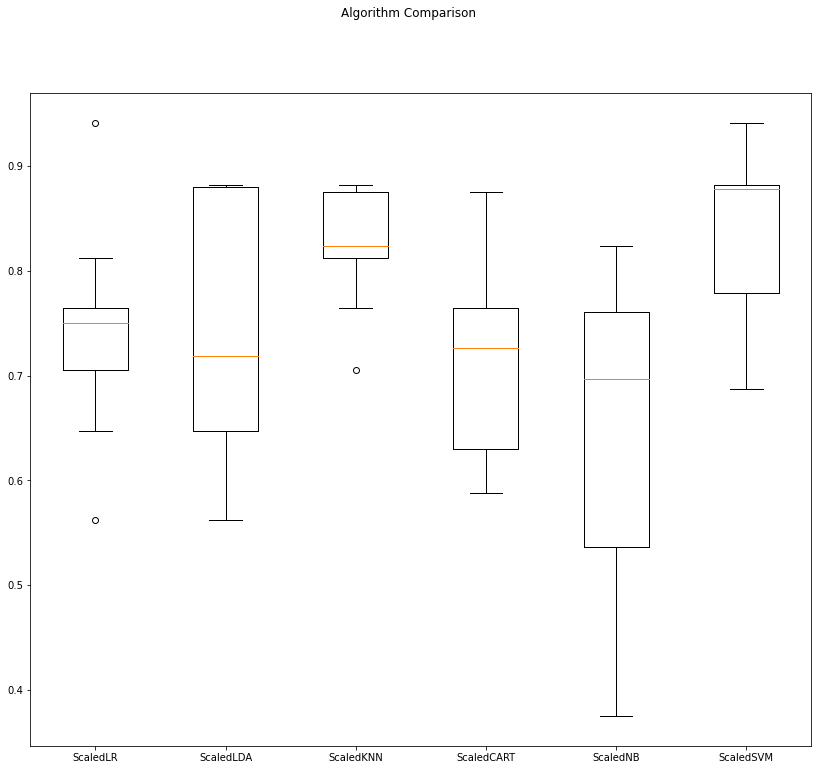

In [26]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='scale'))])))

eval_algorithms(pipelines)

# Improve results with algorithm

## KNN Algorithm

In [27]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, Y_train)

# Print results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.85 using {'n_neighbors': 1}
0.85 (0.05968577609876672) with: {'n_neighbors': 1}
0.8371323529411765 (0.06601389343386418) with: {'n_neighbors': 3}
0.8375 (0.03737725007982011) with: {'n_neighbors': 5}
0.7639705882352941 (0.0893737825672642) with: {'n_neighbors': 7}
0.7514705882352941 (0.08705087404087493) with: {'n_neighbors': 9}
0.7334558823529411 (0.104830998652816) with: {'n_neighbors': 11}
0.7330882352941176 (0.10580573208090603) with: {'n_neighbors': 13}
0.7279411764705882 (0.07614821756326462) with: {'n_neighbors': 15}
0.7099264705882353 (0.07928656388570995) with: {'n_neighbors': 17}
0.7220588235294118 (0.08508785913176035) with: {'n_neighbors': 19}
0.7102941176470587 (0.10950452661639593) with: {'n_neighbors': 21}


C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


## SVM Tunning

In [28]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False) 
grid_result = grid.fit(rescaledX, Y_train)

# Print results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.8661764705882353 using {'C': 1.5, 'kernel': 'rbf'}
0.7584558823529413 (0.09948301158200631) with: {'C': 0.1, 'kernel': 'linear'}
0.5294117647058824 (0.11882453042676783) with: {'C': 0.1, 'kernel': 'poly'}
0.5731617647058824 (0.1309303654500583) with: {'C': 0.1, 'kernel': 'rbf'}
0.7040441176470589 (0.06693297175243644) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.7463235294117647 (0.10950699524194979) with: {'C': 0.3, 'kernel': 'linear'}
0.6426470588235295 (0.13218739646981145) with: {'C': 0.3, 'kernel': 'poly'}
0.7658088235294118 (0.09169164818973898) with: {'C': 0.3, 'kernel': 'rbf'}
0.7349264705882353 (0.054566800193808336) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.7400735294117646 (0.08263557723261496) with: {'C': 0.5, 'kernel': 'linear'}
0.6801470588235293 (0.09859523701095135) with: {'C': 0.5, 'kernel': 'poly'}
0.788235294117647 (0.06418995518008062) with: {'C': 0.5, 'kernel': 'rbf'}
0.7466911764705882 (0.05874190108352445) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.7466911764705882

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


# Improve results with ensemble methods

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB: 81.98529411764707 (5.829264110434879)


C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: 83.52941176470587 (13.913194802753864)


C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 82.42647058823529 (5.939064854796667)


C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ET: 86.02941176470588 (7.32162448648572)


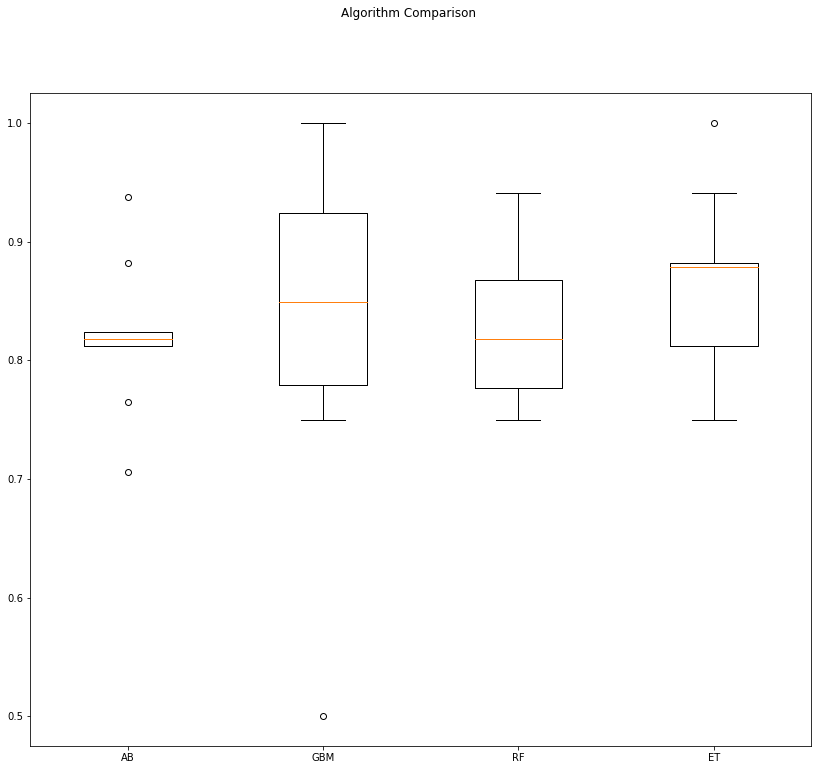

In [29]:
# Ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=100))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=100))) 

eval_algorithms(ensembles)

# Final model

In [30]:
# Prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
clf = SVC(C=1.5, kernel='rbf', gamma='auto')
clf.fit(rescaledX, Y_train)

# Estimate accuracy on test dataset
rescaledTestX = scaler.transform(X_test)
pred = clf.predict(rescaledTestX)

print('Accuracy score: {}'.format(accuracy_score(Y_test, pred)))
print('\nConfusion matrix:\n {}'.format(confusion_matrix(Y_test, pred)))
print('\nClassification report:\n {}'.format(classification_report(Y_test, pred)))

Accuracy score: 0.8571428571428571

Confusion matrix:
 [[23  4]
 [ 2 13]]

Classification report:
               precision    recall  f1-score   support

        Mine       0.92      0.85      0.88        27
        Rock       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



# Save the model

In [31]:
# Save the model to disk
filename = 'finalized_model.sav' 
dump(clf, open(filename, 'wb'))

# Some time later...
# Load the model from disk
loaded_clf = load(open(filename, 'rb'))

# The data must be standardized as in original model training
result = loaded_clf.score(rescaledTestX, Y_test)
print(result)

0.8571428571428571
